In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/MyDrive/dataset.csv'


In [ ]:
import pandas as pd

df = pd.read_csv(file_path)
df.head()


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [ ]:
df.size

2394000

In [ ]:
df.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

Data Pre-processing

In [ ]:
df_cleaned = df.drop(columns=[
    'Unnamed: 0', 'track_id', 'track_name', 'album_name',
    'artists', 'explicit', 'track_genre'
])

In [ ]:
df_cleaned.columns

Index(['popularity', 'duration_ms', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')

In [ ]:
df_cleaned.size

1596000

In [ ]:
df_cleaned.dropna()
df_cleaned.head(5)

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,73,230666,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4
1,55,149610,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4
2,57,210826,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4
3,71,201933,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3
4,82,198853,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4


In [ ]:
df_cleaned.isnull().sum()

,0
popularity,0
duration_ms,0
danceability,0
energy,0
key,0
loudness,0
mode,0
speechiness,0
acousticness,0
instrumentalness,0


In [ ]:
df_cleaned.dtypes

,0
popularity,int64
duration_ms,int64
danceability,float64
energy,float64
key,int64
loudness,float64
mode,int64
speechiness,float64
acousticness,float64
instrumentalness,float64


Scaling numerical features

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cleaned)

# Convert back to DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=df_cleaned.columns)
scaled_df.head()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,1.782627,0.024575,0.629244,-0.717148,-1.210442,0.300828,-1.326281,0.551848,-0.850202,-0.504109,0.758743,0.929306,-1.141863,0.221823
1,0.975633,-0.730859,-0.845908,-1.889980,-1.210442,-1.784744,0.753988,-0.078993,1.831732,-0.504094,-0.591211,-0.798690,-1.489717,0.221823
2,1.065299,-0.160332,-0.742186,-1.122669,-1.491343,-0.293288,0.753988,-0.273826,-0.315499,-0.504112,-0.507167,-1.365688,-1.528312,0.221823
3,1.692961,-0.243214,-1.733304,-2.312994,-1.491343,-2.039252,0.753988,-0.457309,1.774593,-0.503883,-0.428376,-1.276974,1.987859,-2.089680
4,2.186125,-0.271919,0.295030,-0.788711,-0.929541,-0.282750,0.753988,-0.303145,0.463399,-0.504112,-0.686285,-1.184403,-0.073348,0.221823


In [ ]:
scaled_df.to_csv('/content/drive/My Drive/spotify_scaled.csv', index=False)


In [ ]:
!pip install pyswarms

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 5.6 MB/s eta 0:00:00


In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pyswarms as ps

In [ ]:
def fitness_function(k_values):
    scores = []
    for k_arr in k_values:
        k = int(k_arr[0])
        if k < 2 or k > 15:
            scores.append(-1)  # invalid k
            continue
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(scaled_df)
        score = silhouette_score(scaled_df, labels)
        scores.append(score)
    return -1 * np.array(scores)  # because PSO minimizes

In [ ]:
# STEP 1: Import required libraries
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pyswarms as ps
from sklearn.preprocessing import StandardScaler


Sampling 3000 rows for optimization efficiency

In [ ]:
sample_df = scaled_df.sample(n=3000, random_state=42)

Silhouette score

In [ ]:
def fitness_function(k_values):
    scores = []
    for k_arr in k_values:
        k = int(k_arr[0])
        if k < 2 or k > 15:
            scores.append(-1)
            continue
        model = KMeans(n_clusters=k, random_state=42).fit(sample_df)
        labels = model.labels_
        score = silhouette_score(sample_df, labels)
        scores.append(score)
    return -1 * np.array(scores)  # PSO minimizes, so we return -score


Particle Swarm Optimization

In [ ]:
options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}  # cognitive, social, inertia weights

optimizer = ps.single.GlobalBestPSO(
    n_particles=5,  # reduced for speed
    dimensions=1,
    options=options,
    bounds=([2], [15])  # Search between 2 and 15 clusters
)

best_cost, best_k = optimizer.optimize(fitness_function, iters=10)
optimal_k = int(best_k[0])
print(f"\n✅ Optimal number of clusters found: {optimal_k}")


2025-07-15 12:20:16,105 - pyswarms.single.global_best - INFO - Optimize for 10 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|10/10, best_cost=-0.11
2025-07-15 12:20:27,833 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.10992856595816856, best pos: [8.64874452]



✅ Optimal number of clusters found: 8


Applying K-means Clustering for k=8

In [ ]:
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
labels = final_kmeans.fit_predict(sample_df)

# Add cluster labels to the data
sample_df['cluster'] = labels

PCA

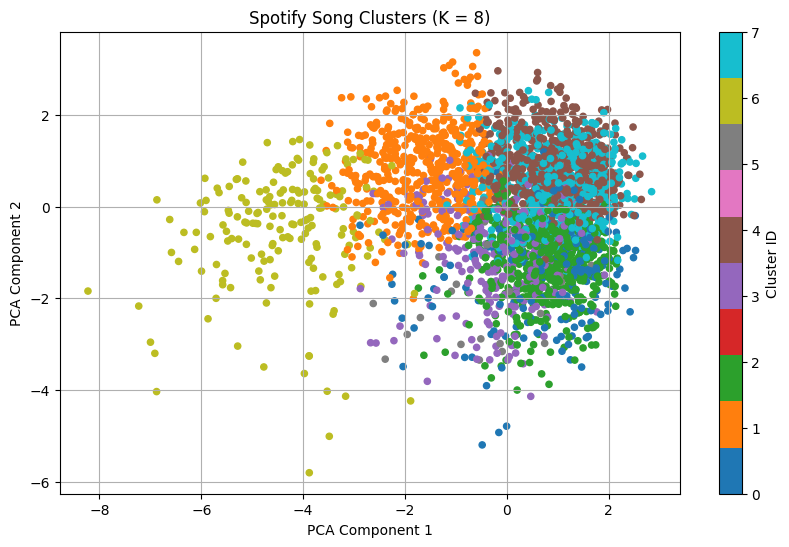

In [ ]:
pca = PCA(n_components=2)
reduced = pca.fit_transform(sample_df.drop('cluster', axis=1))

plt.figure(figsize=(10,6))
plt.scatter(reduced[:, 0], reduced[:, 1], c=sample_df['cluster'], cmap='tab10', s=20)
plt.title(f'Spotify Song Clusters (K = {optimal_k})')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster ID')
plt.grid(True)
plt.show()


**Mood** **Labelling**

In [ ]:
# Drop PCA components if added earlier
features = sample_df.drop('cluster', axis=1)
cluster_labels = sample_df['cluster']

# Combine features and cluster labels
combined_df = features.copy()
combined_df['cluster'] = cluster_labels

# Calculate mean of features per cluster
cluster_means = combined_df.groupby('cluster').mean()
cluster_means

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
cluster,,,,,,,,,,,,,,
0,0.029107,0.115217,-0.339060,0.571709,0.093741,0.326566,0.011035,0.043274,-0.100425,-0.263536,2.943320,0.133982,-0.006101,-0.014044
1,-0.017710,-0.173830,-0.195239,-1.142668,-0.204237,-0.554711,0.301410,-0.284092,1.205125,-0.323255,-0.299263,-0.342191,-0.214971,-0.073732
2,0.073786,0.131954,-0.852041,0.723725,-0.142913,0.602214,0.249445,0.040083,-0.743438,-0.318261,-0.051365,-0.595441,0.725112,0.049323
3,-0.222370,0.694415,0.117252,0.437310,0.151928,-0.014815,-0.219281,-0.120584,-0.589051,2.041952,-0.254576,-0.674951,0.148386,0.131014
4,-0.056262,-0.195064,0.635496,0.300560,0.009866,0.377574,0.753988,-0.020679,-0.307841,-0.459849,-0.243344,0.849467,-0.090913,0.180485
5,-0.314179,0.266212,0.182443,0.114232,0.075220,-0.582240,-0.046115,7.384441,1.331128,-0.504098,2.766502,-0.039131,-0.200382,-2.000776
6,-0.462660,-0.070826,-1.371830,-1.758109,-0.074691,-2.342959,0.124285,-0.331728,1.602073,1.673743,-0.148490,-1.141594,-0.557391,-1.377487
7,0.131431,-0.088807,0.587047,0.288418,0.215782,0.366678,-1.326281,0.108281,-0.354972,-0.432118,-0.213850,0.441134,-0.138313,0.186078


| Feature            | High Value Suggests          |
| ------------------ | ---------------------------- |
| `valence`          | Positive emotion / Happy     |
| `energy`           | Intensity / Energetic        |
| `danceability`     | Groovy / Dance vibe          |
| `acousticness`     | Calm / Soft / Acoustic       |
| `liveness`         | Live performance feel        |
| `speechiness`      | Rap, spoken lyrics, podcasts |
| `instrumentalness` | Pure music, no vocals        |


In [46]:
mood_labels = {}  # Empty dictionary to hold mood for each cluster

for cluster_num, row in cluster_means.iterrows():
    print(f"\nCluster {cluster_num}:")
    print(row)

    # Assign mood based on features
    if row['valence'] > 0.7 and row['danceability'] > 0.6:
        mood = "Happy / Party Vibes"
    elif row['acousticness'] > 0.7:
        mood = "Calm / Acoustic / Relaxing"
    elif row['energy'] > 0.7 and row['valence'] < 0.4:
        mood = "Energetic but Dark"
    elif row['instrumentalness'] > 0.7:
        mood = "Instrumental / Lo-fi / Study"
    elif row['valence'] < 0.3 and row['energy'] < 0.4:
        mood = "Sad / Low Energy"
    elif row['speechiness'] > 0.5:
        mood = "Rap / Spoken Word"
    elif row['energy'] > 0.8 and row['danceability'] > 0.7:
        mood = "Dance / Upbeat"
    else:
        mood = "Mixed / Undefined"

    print(f"🎧 Mood Label: {mood}")
    mood_labels[cluster_num] = mood  # Save to dictionary

# Print final mapping
print("\n📌 Final Mood Labels per Cluster:")
for k, v in mood_labels.items():
    print(f"Cluster {k}: {v}")


Cluster 0:
popularity          0.029107
duration_ms         0.115217
danceability       -0.339060
energy              0.571709
key                 0.093741
loudness            0.326566
mode                0.011035
speechiness         0.043274
acousticness       -0.100425
instrumentalness   -0.263536
liveness            2.943320
valence             0.133982
tempo              -0.006101
time_signature     -0.014044
Name: 0, dtype: float64
🎧 Mood Label: Mixed / Undefined

Cluster 1:
popularity         -0.017710
duration_ms        -0.173830
danceability       -0.195239
energy             -1.142668
key                -0.204237
loudness           -0.554711
mode                0.301410
speechiness        -0.284092
acousticness        1.205125
instrumentalness   -0.323255
liveness           -0.299263
valence            -0.342191
tempo              -0.214971
time_signature     -0.073732
Name: 1, dtype: float64
🎧 Mood Label: Calm / Acoustic / Relaxing

Cluster 2:
popularity          0.073786
du

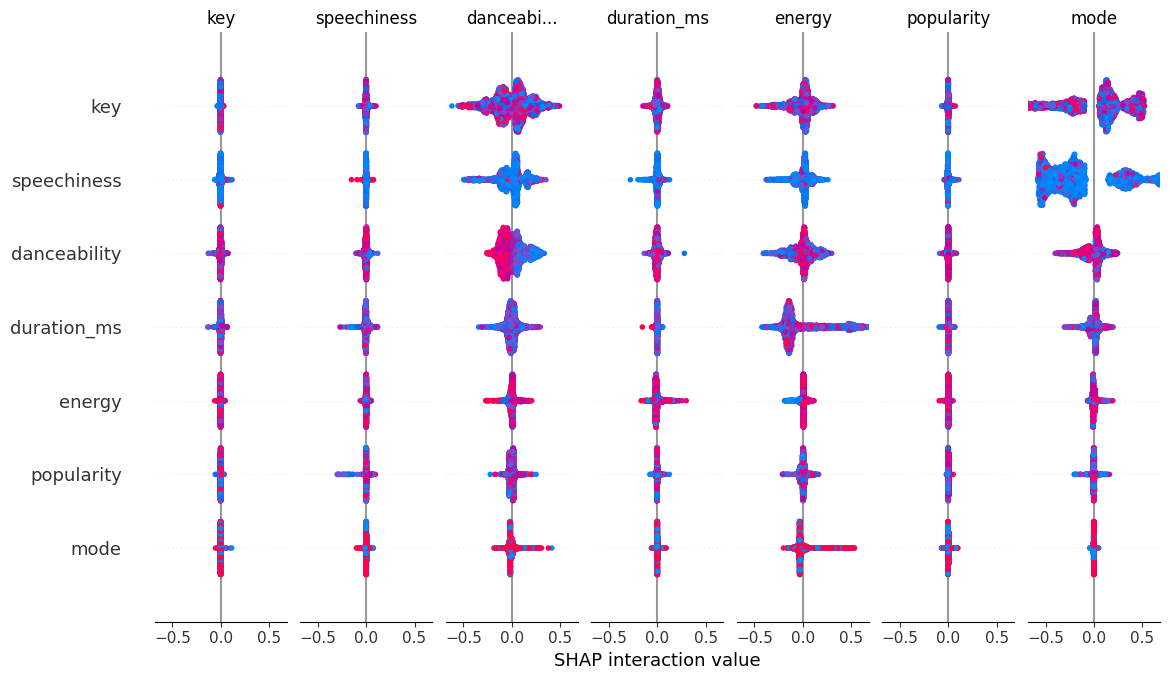

In [75]:
# Create folder
import os
os.makedirs("images", exist_ok=True)

# Train model
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(features, cluster_labels)

# Explain using SHAP
import shap
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(features)

# Save SHAP plot
shap.summary_plot(shap_values, features, show=False)
plt.savefig('images/shap_plot.png', dpi=300, bbox_inches='tight')
plt.show()

In [48]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
features = sample_df.drop('cluster', axis=1)
labels = sample_df['cluster']

In [66]:
# Run t-SNE on features
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_result = tsne.fit_transform(features)

# Convert to DataFrame
tsne_df = pd.DataFrame(tsne_result, columns=['TSNE1', 'TSNE2'])

# Assign correct cluster and valence from sample_df
tsne_df['cluster'] = sample_df['cluster'].values
tsne_df['valence'] = sample_df['valence'].values


In [67]:
tsne_df.head()

,TSNE1,TSNE2,cluster,valence
0,-23.804766,1.541370,2,-1.648802
1,6.833381,-4.987268,2,-1.715144
2,20.627766,-6.701503,1,-1.486416
3,-20.201544,-37.969528,4,0.478021
4,55.543194,-4.838551,7,1.307305


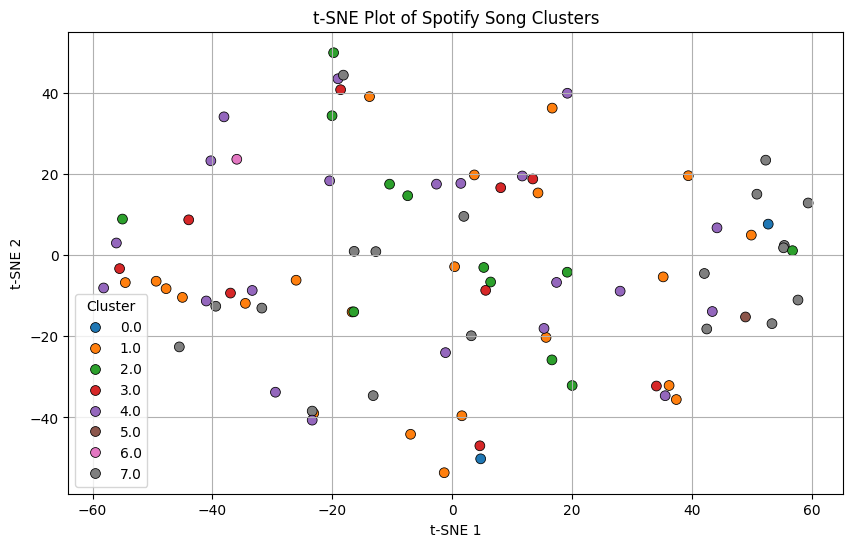

In [77]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='TSNE1', y='TSNE2', hue='cluster', palette='tab10',
    data=tsne_df, s=50, edgecolor='black'
)
plt.title('t-SNE Plot of Spotify Song Clusters')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.savefig("images/tsne_clusters.png", dpi=300, bbox_inches='tight')
plt.show()

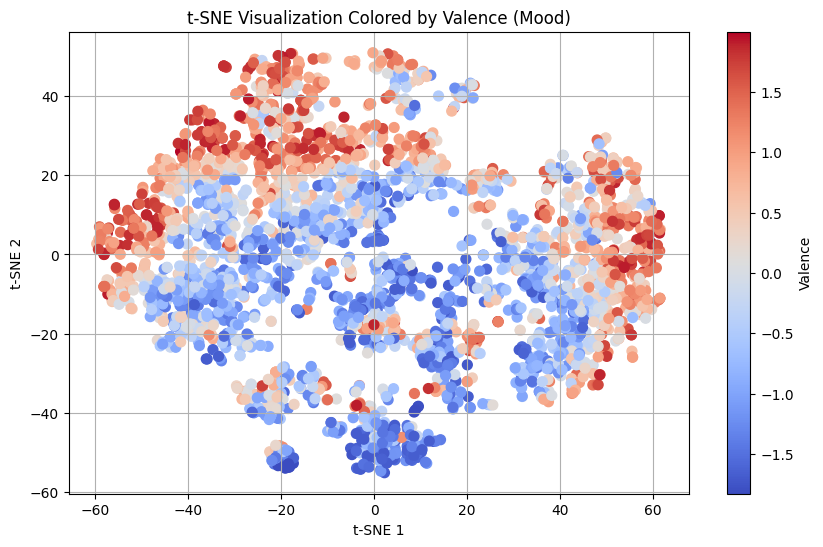

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract t-SNE and valence values
x = tsne_df['TSNE1']
y = tsne_df['TSNE2']
valence = tsne_df['valence']

plt.figure(figsize=(10, 6))
scatter = plt.scatter(x, y, c=valence, cmap='coolwarm', s=50)
plt.title('t-SNE Visualization Colored by Valence (Mood)')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
cbar = plt.colorbar(scatter)
cbar.set_label('Valence')
plt.grid(True)
plt.savefig('images/tsne_valence.png')
plt.show()

In [70]:
# Add t-SNE + cluster to a DataFrame (if not already done)
tsne_df['cluster'] = sample_df['cluster']

# Compute cluster centers in t-SNE space
centers = tsne_df.groupby('cluster')[['TSNE1', 'TSNE2']].mean()

In [71]:
mood_labels = {
    0: "Happy",
    1: "Chill",
    2: "Energetic",
    3: "Sad",
    4: "Lo-fi",
    5: "Dark",
    6: "Calm",
    7: "Mixed"
}

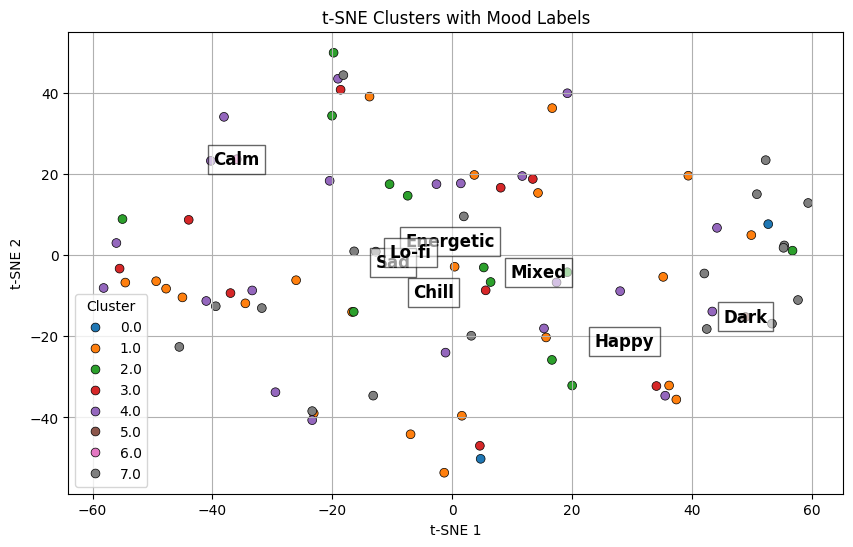

In [79]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='TSNE1', y='TSNE2', hue='cluster',
    palette='tab10', data=tsne_df, s=40, edgecolor='black'
)

# Add mood labels at each cluster center
for cluster_id, (x, y) in centers.iterrows():
    label = mood_labels.get(cluster_id, f"Cluster {cluster_id}")
    plt.text(x, y, label, fontsize=12, weight='bold',
             ha='center', va='center', bbox=dict(facecolor='white', alpha=0.6, edgecolor='black'))

plt.title("t-SNE Clusters with Mood Labels")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.grid(True)
plt.legend(title='Cluster', loc='best')
plt.savefig("images/tsne_mood_labels.png", dpi=300, bbox_inches='tight')
plt.show()

In [73]:
cluster_means

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
cluster,,,,,,,,,,,,,,
0,0.029107,0.115217,-0.339060,0.571709,0.093741,0.326566,0.011035,0.043274,-0.100425,-0.263536,2.943320,0.133982,-0.006101,-0.014044
1,-0.017710,-0.173830,-0.195239,-1.142668,-0.204237,-0.554711,0.301410,-0.284092,1.205125,-0.323255,-0.299263,-0.342191,-0.214971,-0.073732
2,0.073786,0.131954,-0.852041,0.723725,-0.142913,0.602214,0.249445,0.040083,-0.743438,-0.318261,-0.051365,-0.595441,0.725112,0.049323
3,-0.222370,0.694415,0.117252,0.437310,0.151928,-0.014815,-0.219281,-0.120584,-0.589051,2.041952,-0.254576,-0.674951,0.148386,0.131014
4,-0.056262,-0.195064,0.635496,0.300560,0.009866,0.377574,0.753988,-0.020679,-0.307841,-0.459849,-0.243344,0.849467,-0.090913,0.180485
5,-0.314179,0.266212,0.182443,0.114232,0.075220,-0.582240,-0.046115,7.384441,1.331128,-0.504098,2.766502,-0.039131,-0.200382,-2.000776
6,-0.462660,-0.070826,-1.371830,-1.758109,-0.074691,-2.342959,0.124285,-0.331728,1.602073,1.673743,-0.148490,-1.141594,-0.557391,-1.377487
7,0.131431,-0.088807,0.587047,0.288418,0.215782,0.366678,-1.326281,0.108281,-0.354972,-0.432118,-0.213850,0.441134,-0.138313,0.186078
